In [1]:
import re
from textblob import TextBlob
import pandas as pd
from tqdm import tqdm
import warnings

In [2]:
tweets = pd.read_csv("tweets.csv")
tweets.drop(columns=["id", "label"], inplace=True)
tweets.rename(columns={ "tweet": "text" }, inplace=True)
tweets.head()

text
0   @user when a father is dysfunctional and is s...
1  @user @user thanks for #lyft credit i can't us...
2                                bihday your majesty
3  #model   i love u take with u all the time in ...
4             factsguide: society now    #motivation

In [3]:
tqdm.pandas(ncols=100, unit=" rows", colour="#ffcb6b", ascii=" ▇")

In [4]:
tweets["text"] = tweets["text"].progress_apply(
	lambda x : ' '.join(re.sub("(\@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", str(x)).split())
)
tweets.head()

100%|▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇| 31962/31962 [00:00<00:00, 76295.14 rows/s]


text
0  when a father is dysfunctional and is so selfi...
1  thanks for lyft credit i can t use cause they ...
2                                bihday your majesty
3      model i love u take with u all the time in ur
4                  factsguide society now motivation

In [5]:
analyzed = tweets.progress_apply(
	lambda t : list(TextBlob(t["text"]).sentiment),
	axis="columns",
	result_type="expand"
).rename(
	columns={ 0: "polarity", 1: "subjectivity"}
)
tweets = pd.concat([ tweets, analyzed ], axis="columns")
tweets.head()

100%|▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇| 31962/31962 [00:06<00:00, 4833.02 rows/s]


text  polarity  subjectivity
0  when a father is dysfunctional and is so selfi...      -0.5           1.0
1  thanks for lyft credit i can t use cause they ...       0.2           0.2
2                                bihday your majesty       0.0           0.0
3      model i love u take with u all the time in ur       0.5           0.6
4                  factsguide society now motivation       0.0           0.0

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

sample = tweets.sample(1000)

<AxesSubplot: xlabel='polarity', ylabel='subjectivity'>

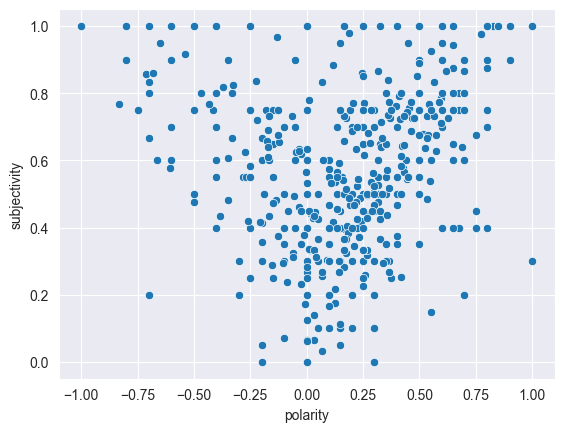

In [7]:
sns.scatterplot(x=sample["polarity"], y=sample["subjectivity"])

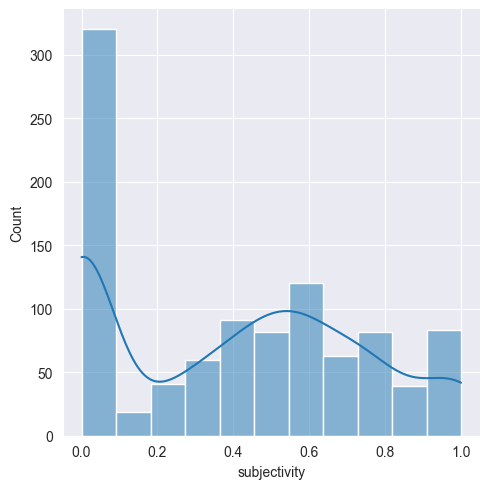

In [8]:
sns.displot(sample["subjectivity"], kde=True)

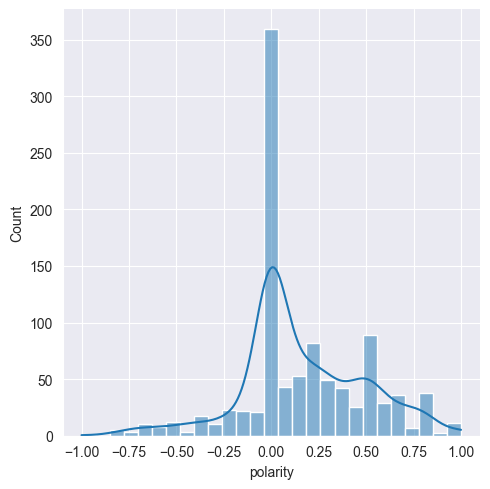

In [9]:
sns.displot(sample["polarity"], kde=True)

In [10]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [41]:
def word_sentiment(word, sampleSize = 50):
	d = nlp(word)
	warnings.filterwarnings('ignore')
	s = tweets.sample(sampleSize)
	sa = s.progress_apply(
		lambda i : max([ nlp(t.strip()).similarity(d) if len(t.strip()) > 0 else 0 for t in i["text"].split(" ") ]) > 0.3,
		axis="columns",
		result_type="expand"
	)
	warnings.filterwarnings('default')
	s = pd.concat([ s, sa ], axis="columns").rename(columns={ 0: "related" })
	s = s[s["related"]]
	sns.scatterplot(x=s["polarity"], y=s["subjectivity"])
	sns.displot(s["polarity"], kde=True)
	sns.displot(s["subjectivity"], kde=True)

100%|▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇| 50/50 [00:03<00:00, 14.46 rows/s]


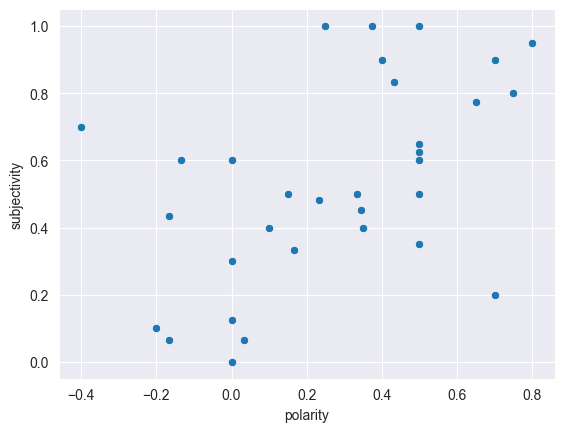

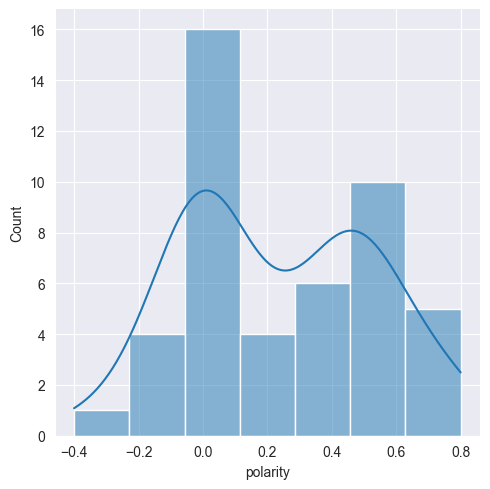

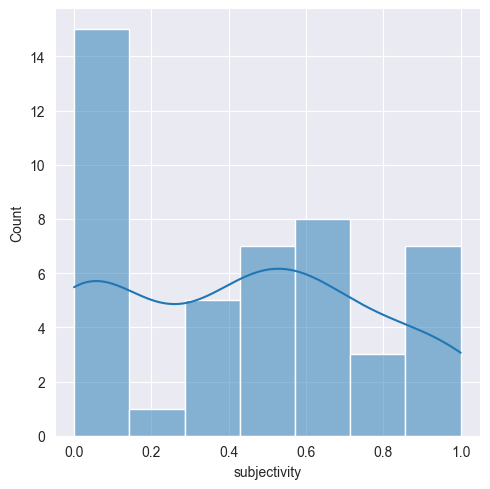

In [42]:
word_sentiment("conservative")

100%|▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇| 100/100 [00:06<00:00, 14.93 rows/s]


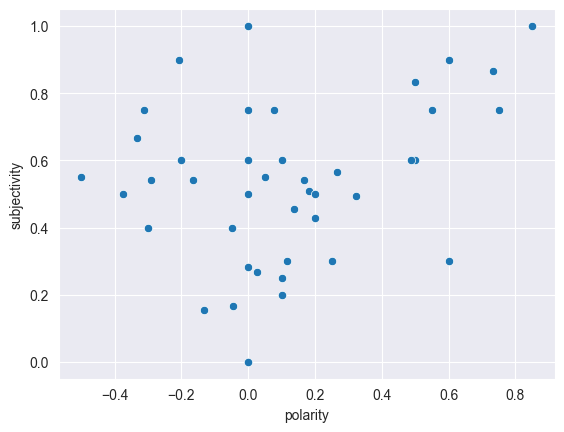

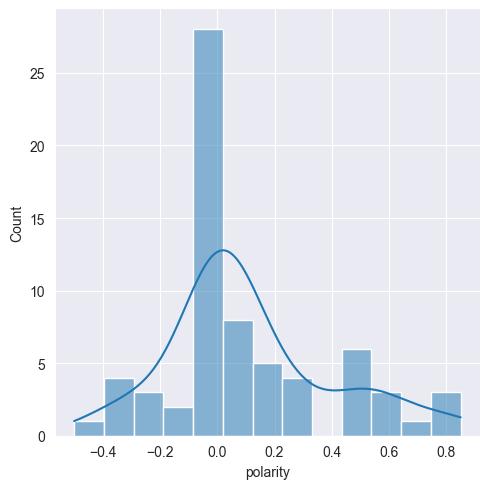

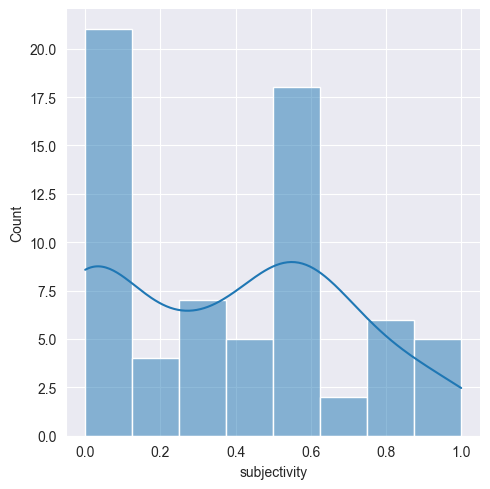

In [43]:
word_sentiment("republican", 100)

100%|▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇| 200/200 [00:11<00:00, 17.32 rows/s]


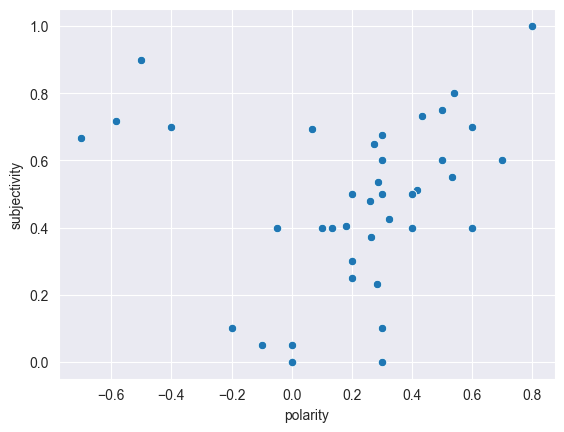

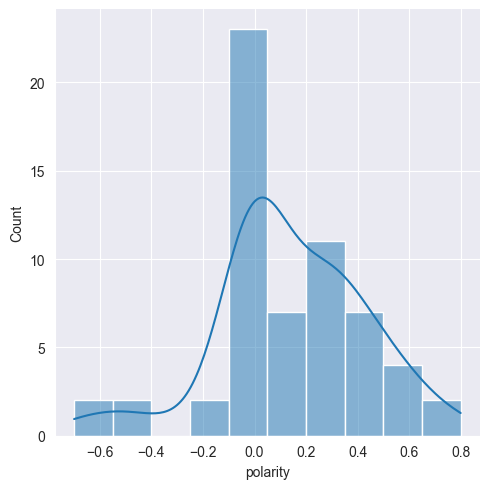

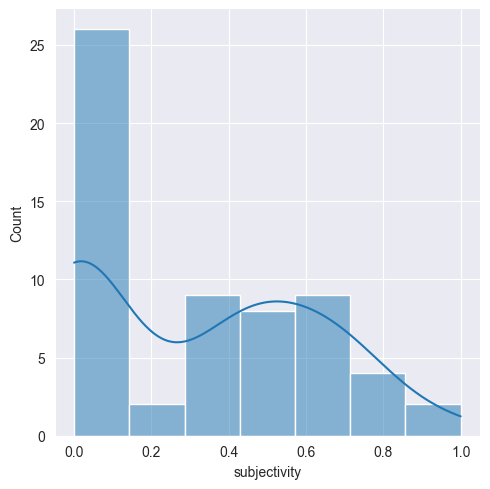

In [44]:
word_sentiment("pizza", 200)